# What to do
- chapter 6 of the fish book


## SGD

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            

In [75]:
Updater = SGD()


In [2]:
import numpy as np

## Momentum

In [3]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr *grads[key]
            params[key] += self.v[key]

## The function

In [4]:
def long_tube(x):
    return 1/20*x[0]**2 + x[1]**2

In [60]:
X,Y = np.meshgrid(np.arange(-10,10, 1), np.arange(-5,5,0.5))

In [61]:
X.shape

(20, 20)

In [62]:
Y.shape

(20, 20)

## 3D Graph

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

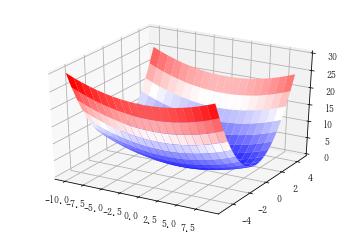

In [64]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, long_tube([X,Y]), linewidth = 0, cmap = 'bwr')

## Contour plot

C:\Users\shota.shimizu\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


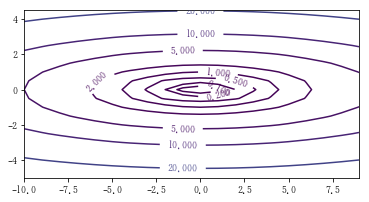

In [65]:
cont = plt.contour(X, Y, long_tube([X,Y]), levels = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100])
cont.clabel()
plt.gca().set_aspect('equal')

In [66]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

In [67]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

def numerical_gradient_simple(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

## Calculate gradient

In [72]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.shape[0]):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    
    return grad

In [73]:
grad = numerical_gradient(long_tube, np.array([X, Y]) )

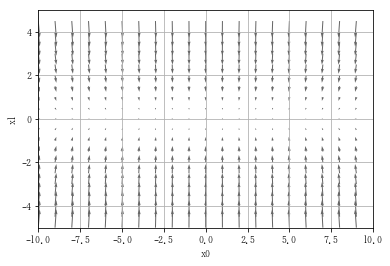

In [74]:
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

In [41]:
x = [X,Y]
grad = np.zeros_like(x)
grad.shape
h = 1e-4
it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])

In [45]:
it.iternext()

True

In [50]:
idx = it.multi_index
#x[idx]
x.shape

AttributeError: 'list' object has no attribute 'shape'

In [39]:
i = 0
while not it.finished:
    i += 1
    if i % 1000 == 0:
        print(i)
        
    it.iternext()   

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
